<h1 align="center"><font size="5">OVERVIEW</font></h1>
# Introduction
**NLP (Natural Language Processing)** is important for scientific, economic, social, and cultural reasons. NLP is experiencing rapid growth as its theories and methods are deployed in a variety of new language technologies. For this reason it is important for a wide range of people to have a working knowledge of NLP. Within industry, this includes people in human-computer interaction, business information analysis, and web software development. Within academia, it includes people in areas from humanities computing and corpus linguistics through to computer science and artificial intelligence. (To many people in academia, NLP is known by the name of "Computational Linguistics.")<br>
**Sentiment analysis** is a vital topic in the field of NLP. It has easily become one of the hottest topics in the field because of its relevance and the number of business problems it is solving and has been able to answer. In this tutorial, you will cover this not-so-simple topic in a simple way. You will break down all the little mathematics behind it, and you will study it. You will also build a simple sentiment classifier at the end of this tutorial. 

## 1. Business Understanding
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first **classify positive, negative, and neutral tweets**, followed by categorizing negative reasons (such as "late flight" or "rude service").
## 2. Data Understanding
The data understanding phase of CRISP-DM involves **taking a closer look at the data available for mining**. This step is critical in avoiding unexpected problems for data mining sentiment analysis Twitter dataset US airline during the next phase data preparation which is typically the longest part of a project. <br>
In this section we use data from csv, so we doesn't to scrap from Twitter.

### 2.1 Install Package
The first step as always is to import the required libraries:<br>
1. package for Natural Language Toolkit
2. package for resolve a modular challenge in a larger pipeline
3. package for regex
4. package for visualization text
5. package to show how many test samples the model finished predicting

In [1]:
!pip install nltk 
!pip install textblob 
!pip install re 
!pip install wordcloud 
!pip install tqdm 

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 2.2 Load Libraries

In [2]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.corpus import stopwords
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from textblob import TextBlob

#stemming
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2.3 Load and Sneak Peak Dataset

In [3]:
#import dataset
df = pd.read_csv('../Dataset/tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


From the dataset, we can use field airline_sentiment as a field to sentiment analysis. So, we don't need to labelling in each tweet.

In [4]:
df.shape

(14485, 15)

There is 14485 rows and 15 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


This dataset has field with 3 type of data (integer, object, and float)

## 3. Data Preparation
Data preparation is one of the most important and often time-consuming aspects of data mining. In this section, make data ready for modelling, cleansing, formatting, and sample exploratory data analysis.

### 3.1 Cleaning Data
In this section we should taking closer with problems in the data that have been chosen for analysis. Detect missing data, data errors, handling noise, anomaly detection, duplicate detection, etc.

### 3.1.1 Duplicate Detection
This is process of identifying different or multiple records that refer to one unique real-world entity or object.

In [6]:
#drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [7]:
#check the number of data after drop duplicate
len(df)

14485

Based on the calculation, we know that the total number of rows is constantly. It shows that there is no duplicate data on the dataset.

### 3.1.2 Remove Punctuation

In [8]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [9]:
#apply function to know the progress map for wordcloud
df['text'] = df['text'].progress_apply(preprocessing)

100%|██████████████████████████████████████████████████████████████████████████| 14485/14485 [00:10<00:00, 1336.25it/s]


### 3.1.3 Stopwords Removal
A **stop word** is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [10]:
#stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    jetblues new ceo seeks right balance please pa...
1               jetblue really getting nerves nothappy
2    united yes waited line almost hour passengers ...
3    united got gate iah time given seats closed fl...
4    southwestair cool bags take bit longer dont gi...
Name: text, dtype: object

### 3.1.4 Frequent Words Removal
Delete the words that come out too often and doesn't have any effect to the results.

In [11]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

united          4143
flight          3824
usairways       3043
americanair     2801
southwestair    2453
jetblue         2360
get             1327
thanks          1052
cancelled       1034
service          948
dtype: int64

In [12]:
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.1.5 Rare Words Removal
Delete the rare words which is indeed less important. 

In [13]:
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
rare_word

mty                  1
httptcomrfbjtepef    1
gabriela             1
bosnia               1
cavalli              1
availableyour        1
httptcoowmaxoyehz    1
httptco0hxlnvzknp    1
childridiculous      1
usxlon               1
dtype: int64

In [14]:
#remove rare words
rare_word = list(rare_word.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.1.6 Spelling Correction
Correct the words spelling in english.

In [15]:
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    jetblues new co seeks right balance please pas...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate ah time given seats closed know peopl...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 3.1.7 Tokenization
Breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens.

In [16]:
TextBlob(df['text'][1]).words

WordList(['really', 'getting', 'nerves', 'nothappy'])

### 3.1.8 Stemming
Process to reduce inflected words to their word steam.

In [17]:
st = PorterStemmer()
df['text'] = df['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['text'].head()

0    jetblu new ceo seek right balanc pleas passeng...
1                             realli get nerv nothappi
2    ye wait line almost hour passeng left want wai...
3    got gate iah time given seat close know peopl ...
4    cool bag take bit longer dont give baggag blue...
Name: text, dtype: object

### 3.1.9 Lemmatisation
This process involves first determining the part of speech of a word, and applying different normalization rules for each part of speech.

In [18]:
df['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0    @AmericanAir to add insult to injury, I have t...
1    @united can you not get the first flight of th...
2    @SouthwestAir better travel photos: My Kindle ...
3    @USAirways @AmericanAir on hold for 8 hour yes...
4    @USAirways I should also add the weather condi...
Name: text, dtype: object

In [19]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,"@AmericanAir to add insult to injury, I have t...",NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@united can you not get the first flight of th...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@SouthwestAir better travel photos: My Kindle ...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@USAirways @AmericanAir on hold for 8 hour yes...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@USAirways I should also add the weather condi...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### 3.1.10 Detect Missing Data
Detect missing value and drop the data that has number of missing value above 60%

In [20]:
#count percentage of missing value
percentage_missing=round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
print(percentage_missing)

negativereason_gold             99.78
airline_sentiment_gold          99.72
tweet_coord                     93.05
negativereason                  37.30
user_timezone                   32.97
tweet_location                  32.36
negativereason_confidence       28.09
text                             0.40
tweet_created                    0.00
retweet_count                    0.00
name                             0.00
airline                          0.00
airline_sentiment_confidence     0.00
airline_sentiment                0.00
tweet_id                         0.00
dtype: float64


In [21]:
#delete field which has missing value above 60%
dfinal = df.drop(['tweet_coord','airline_sentiment_gold','negativereason_gold'],1)
dfinal.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,JetBlueNews,0,"@AmericanAir to add insult to injury, I have t...",2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,nesi_1992,0,@united can you not get the first flight of th...,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,CPoutloud,0,@SouthwestAir better travel photos: My Kindle ...,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,brenduch,0,@USAirways @AmericanAir on hold for 8 hour yes...,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,VahidESQ,0,@USAirways I should also add the weather condi...,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


## 4. Data Exploration
In this section will describe results of this task EDA (**Exploratory Data Analysis**), including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate include graphs and plots to indicate data characteristics that suggest further examination of interesting data subsets.

### 4.1 Explore Sentiment Class
In this section we will count the sentiment class the see the number of each class. So that we can know the highest and the lowest sentiment class.

In [22]:
#count sentiment 
sentiment = dfinal.groupby(['airline_sentiment'])['airline_sentiment'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['airline_sentiment']
chart.drop(['airline_sentiment'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,airline_sentiment,tweet_count,percent
0,negative,9082,0.626993
1,neutral,3069,0.211874
2,positive,2334,0.161132


### 4.2 Visualization
Explore Data Analysis with some of visualization

Text(0.5, 1.0, 'Barplot Sentiment Class')

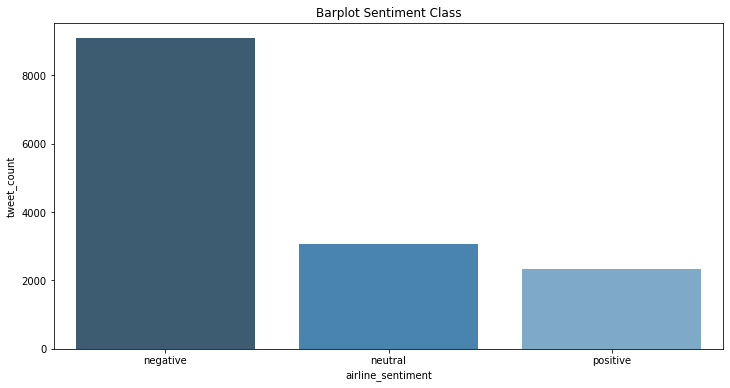

In [23]:
#visualization 
plt.figure(figsize=(12,6))
ax = sns.barplot(x= 'airline_sentiment', y='tweet_count', data=chart, palette="Blues_d")
ax.set_title('Barplot Sentiment Class')

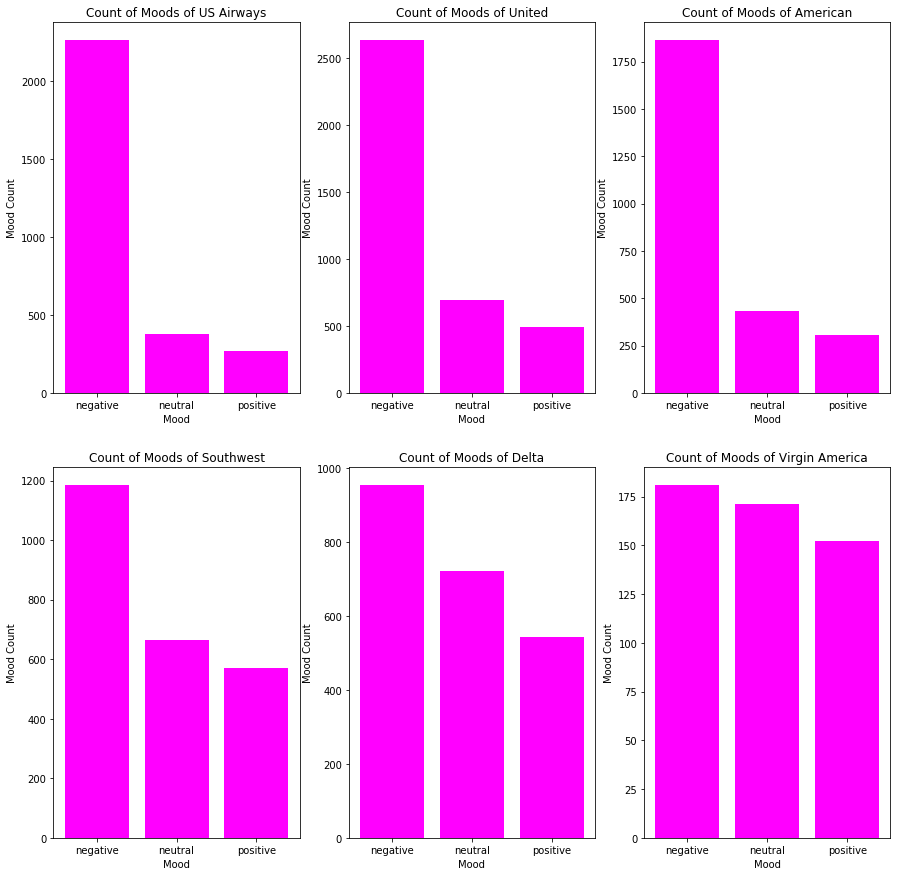

In [24]:
plt.figure(figsize=(15,15))
def plot_sub_sentiment(Airline):
    counts=dfinal[dfinal['airline']==Airline]
    count=counts['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color='magenta')
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the plot above, we can find that the distribution of moods for the first three airlines **(US, United, American) are always skewed toward negative moods**. On contrary, the moods are distributed more balanced with the later three airline companies (Southwest, Delta, and Virgin America).

In [25]:
negative_statement=dict(dfinal['negativereason'].value_counts(sort=False))

In [26]:
def negative_statement(Airline):
    if Airline=='All':
        dfstatement=dfinal
    else:
        dfstatement=dfinal[dfinal['airline']==Airline]
    count=dict(dfstatement['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [27]:
def plot_reason(Airline):
    dfstatement=negative_statement(Airline)
    count=dfstatement['count']
    Index = range(1,(len(dfstatement)+1))
    plt.bar(Index,count, color='coral')
    plt.xticks(Index,dfstatement['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

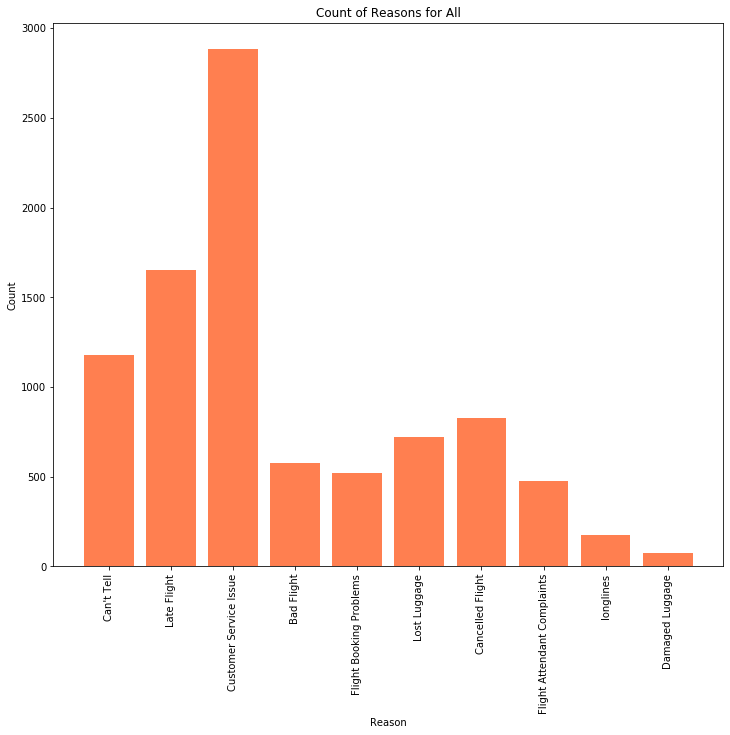

In [28]:
plt.figure(figsize=(12,10))
plot_reason('All')

From the plot above, we can know the negative statements that are most influenced by **Customer Service Issue**. <br>
Then we want to know the reasons that most influence airline users who give negative statements to airlines who most often get negative statements, based on the subplot visualization before between United airlines and US Airways airline.

In [29]:
counts=dfinal[dfinal['airline']=='US Airways']
count=counts['airline_sentiment'].value_counts()
count

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64

In [30]:
counts=dfinal[dfinal['airline']=='United']
count=counts['airline_sentiment'].value_counts()
count

negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64

We can know that **United airline is airline with the most widely negative statement** from their customer. Then we want to know why their customer give United airline negative statements.

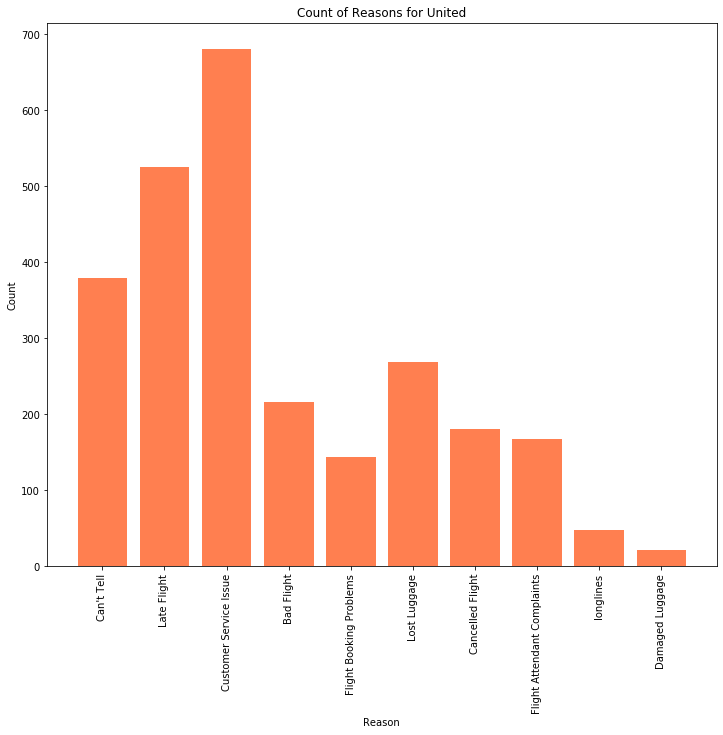

In [31]:
plt.figure(figsize=(12,10))
plot_reason('United')

In [32]:
counta=dfinal[dfinal['airline']=='United']
countb=counta[counta['negativereason']=='Customer Service Issue']
count=countb['negativereason'].value_counts()
count

Customer Service Issue    681
Name: negativereason, dtype: int64

We can conclude that the most negative statement appear because of Customer Service Issue

### 4.3 Word Cloud
**WordCloud** is a technique to show which words are the most frequent among the given text. In this section we will explore data and analysis the insight with word cloud.

In [33]:
#define negative, neutral, and positive sentiment 
negative = dfinal.loc[dfinal['airline_sentiment'] == "negative"]
neutral  = dfinal.loc[dfinal['airline_sentiment'] == "neutral"]
positive  = dfinal.loc[dfinal['airline_sentiment'] == "positive"]

In [34]:
#merge all the negative, neutral, and positive comments into one paragraph
all_negative = "".join([str(negative.text.values)])
all_neutral = "".join([str(neutral.text.values)])
all_positive = "".join([str(positive.text.values)])
alls = all_negative+all_neutral+all_positive

In [35]:
#function to make a wordcloud for each sentiment class
def create_word_cloud(string):
    plt.figure(figsize=(8,6))
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='nearest')
    plt.axis('off')
    plt.show()

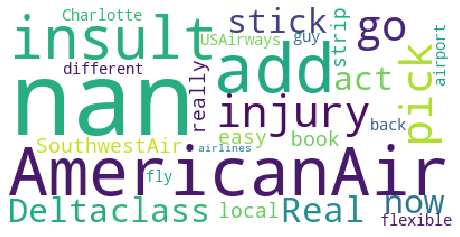

In [36]:
#neutral sentiment class
create_word_cloud(all_neutral)

From word cloud above we know that from the text tweet, the most words that appear in neutral sentiment is **USAirways**

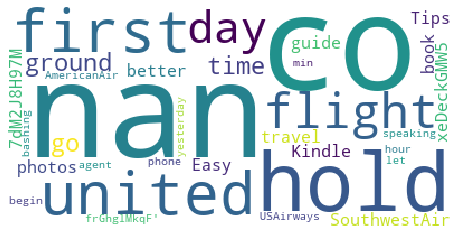

In [37]:
#negative sentiment class
create_word_cloud(all_negative)

From word cloud above we know that from the text tweet, the most words that appear in negative sentiment is **JetBlue**

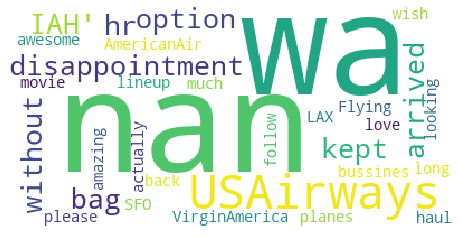

In [38]:
#positive sentiment class
create_word_cloud(all_positive)

From word cloud above we know that from the text tweet, the most words that appear in positive sentiment is **USAirways**

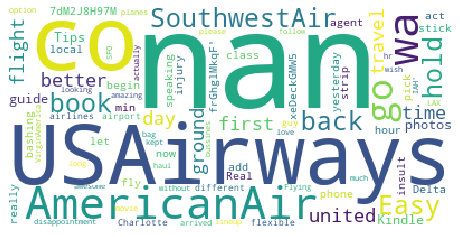

In [39]:
#alls sentiment class
create_word_cloud(alls)

From word cloud above we know that from the text tweet, the most words that appear in all sentiment is **will**

## 5. Feature Extraction
**Feature extraction** is involves reducing the number of resources required to describe a large set of data. It addresses the problem of attaining the most informative and compact set of features, to improve the performance of machine learning models. <br>
In this section we will practice feature extraction with two algorithm:
- **Count vectorizer** is used to convert text to word count vectors
- **TF-IDF vectorizer** is used to convert text to word frequency vectors

### 5.1 Count Vectorizer

In [40]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### 5.2 TF-IDF Vectorizer
This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word. In this section will implement three parameters of TF-IDF:
- **min_df : float in range [0.0, 1.0] or int (default=1)** <br>
    When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None
- **max_df : float in range [0.0, 1.0] or int (default=1.0)** <br>
    When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
- **stop_words_ : set**<br>
    Terms that were ignored because they either:
    occurred in too many documents (max_df)
    occurred in too few documents (min_df)
    were cut off by feature selection (max_features).
    This is only available if no vocabulary was given.

In [41]:
tfidf = TfidfVectorizer(stop_words='english',
                        min_df = 5,
                        max_df = 0.75,
                        use_idf = True)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

<h1 align="center"><font size="5">CONCLUSION</font></h1>
Based on We can find that the Tweets with negative moods are frequently involved some words. People might guess that customer tends to complain when they are waiting for the delayed flights. Then we can know the negative statements that are most influenced by **Customer Service Issue**. We can know that United airline is airline with the most widely negative statement from their customer. Then we want to know why their customer give United airline negative statements.